In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path=Path("../../datasets")
path

PosixPath('../../datasets')

In [5]:
path.ls()

[PosixPath('../../datasets/Kissing'),
 PosixPath('../../datasets/.ipynb_checkpoints'),
 PosixPath('../../datasets/Kicking'),
 PosixPath('../../datasets/Dining'),
 PosixPath('../../datasets/HighFive'),
 PosixPath('../../datasets/Partying'),
 PosixPath('../../datasets/Talking'),
 PosixPath('../../datasets/Hugging'),
 PosixPath('../../datasets/Boxing-Punching'),
 PosixPath('../../datasets/models'),
 PosixPath('../../datasets/Handshaking'),
 PosixPath('../../datasets/Speech')]

In [6]:
path_kissing = path/'Kissing'
path_kicking = path/'Kicking'
path_dining = path/'Dining'
path_highfive = path/'HighFive'
path_partying = path/'Partying'
path_talking = path/'Talking'
path_hugging= path/'Hugging'
path_boxing_punching = path/'Boxing-Punching'
path_handshaking = path/'Handshaking'
path_Speech = path/'Speech'

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['Boxing-Punching',
 'Dining',
 'Handshaking',
 'HighFive',
 'Hugging',
 'Kicking',
 'Kissing',
 'Partying',
 'Speech',
 'Talking']

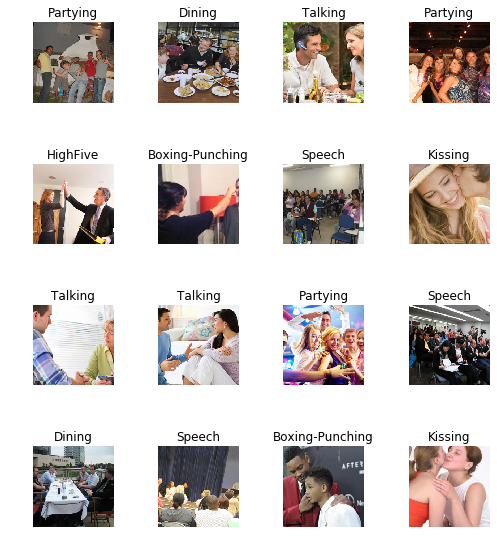

In [13]:
data.show_batch(rows=4, figsize=(7,8))

## Train model RESNET34

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.987239,0.992201,0.332487,00:14
1,1.373537,0.798135,0.291878,00:15
2,1.055544,0.751860,0.281726,00:15
3,0.876670,0.738536,0.266497,00:14


In [18]:
learn.save('stage-1')

## Results

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

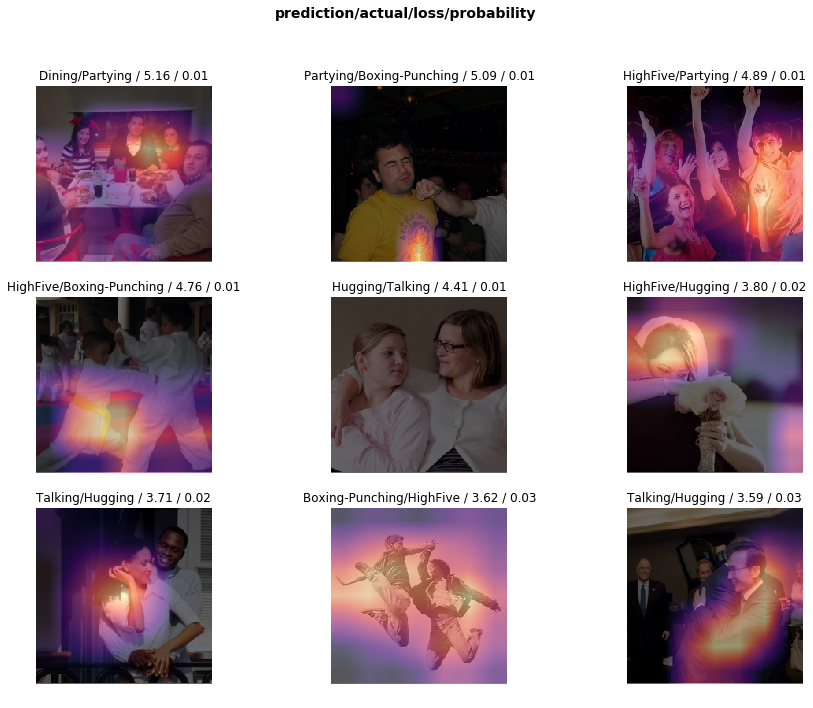

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

In [28]:
help(interp.plot_top_losses)

Help on method _cl_int_plot_top_losses in module fastai.vision.learner:

_cl_int_plot_top_losses(k, largest=True, figsize=(12, 12), heatmap: bool = True, heatmap_thresh: int = 16, return_fig: bool = None) -> Union[matplotlib.figure.Figure, NoneType] method of fastai.train.ClassificationInterpretation instance
    Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.



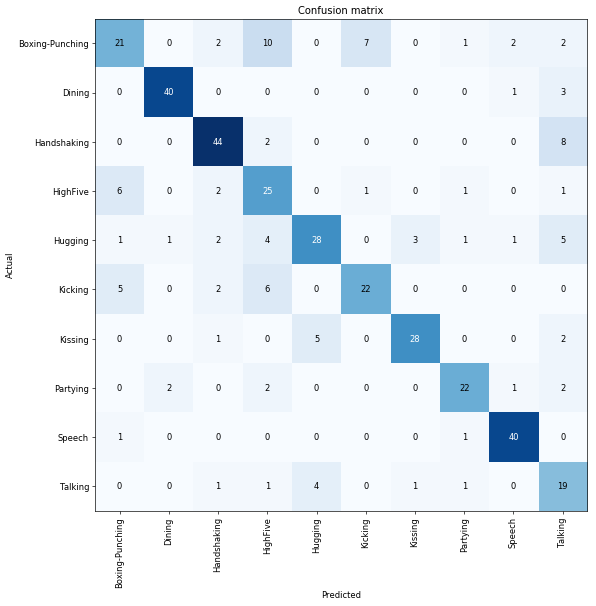

In [29]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [31]:
interp.most_confused(min_val=3)

[('Boxing-Punching', 'HighFive', 10),
 ('Handshaking', 'Talking', 8),
 ('Boxing-Punching', 'Kicking', 7),
 ('HighFive', 'Boxing-Punching', 6),
 ('Kicking', 'HighFive', 6),
 ('Hugging', 'Talking', 5),
 ('Kicking', 'Boxing-Punching', 5),
 ('Kissing', 'Hugging', 5),
 ('Hugging', 'HighFive', 4),
 ('Talking', 'Hugging', 4),
 ('Dining', 'Talking', 3),
 ('Hugging', 'Kissing', 3)]

## Unfreezing, fine-tunning, and learning rates

In [32]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.704167,0.707966,0.215736,00:14


In [34]:
learn.load("stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1578 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Kissing,Kissing,Kissing,Kissing,Kissing
Path: ../../datasets;

Valid: LabelList (394 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Partying,Partying,Handshaking,Hugging,Talking
Path: ../../datasets;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


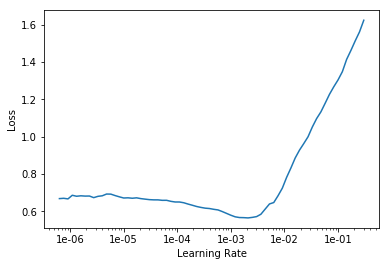

In [36]:
learn.recorder.plot()

In [37]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.632697,0.681187,0.256345,00:14
1,0.570377,0.646317,0.241117,00:14


That's a pretty inaccurate model !!!!

In [38]:
interp.most_confused(min_val=3)

[('Boxing-Punching', 'HighFive', 10),
 ('Handshaking', 'Talking', 8),
 ('Boxing-Punching', 'Kicking', 7),
 ('HighFive', 'Boxing-Punching', 6),
 ('Kicking', 'HighFive', 6),
 ('Hugging', 'Talking', 5),
 ('Kicking', 'Boxing-Punching', 5),
 ('Kissing', 'Hugging', 5),
 ('Hugging', 'HighFive', 4),
 ('Talking', 'Hugging', 4),
 ('Dining', 'Talking', 3),
 ('Hugging', 'Kissing', 3)]

## Training: RESNET50

In [66]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [67]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [68]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 196.00 MiB (GPU 0; 15.90 GiB total capacity; 6.84 GiB already allocated; 178.88 MiB free; 382.28 MiB cached)

In [43]:
learn.save('stage-1-50')

In [44]:
learn.unfreeze()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


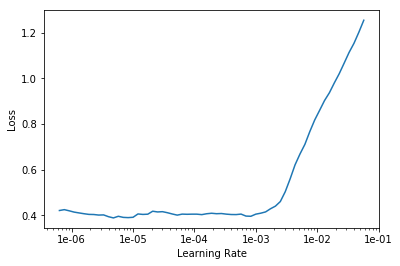

In [46]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(5, max_lr=slice(1e-54,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.400280,0.677657,0.230964,00:17
1,0.395921,0.676878,0.225888,00:18
2,0.375036,0.699351,0.238579,00:18
3,0.341690,0.704505,0.241117,00:17
4,0.318629,0.698181,0.230964,00:16


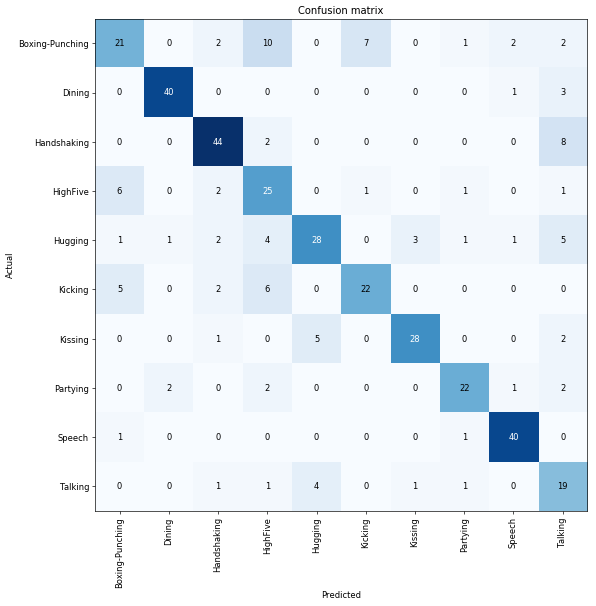

In [49]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)